In [43]:
import pandas as pd
from pandas import DataFrame,Series

In [30]:
df = pd.read_csv('final.csv')

In [31]:
df.drop(columns=['Unnamed: 0', 'neu_sent'], inplace=True)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [33]:
rf_results = DataFrame(index = [3,7,30,90])

In [28]:
topics = []
for i in [3,7,30,90]:
    X = df.drop(columns=['y_3', 'y_7', 'y_30', 'y_90'])
    y = df['y_' + str(i)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    param_grid = {'n_estimators' : [10, 20, 50, 100],
            'min_samples_leaf' : [3, 5, 10],
            'max_features' : [2,4,6]}

    model = RandomForestClassifier()
    grid_search = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=5)
    grid_search.fit(X_train,y_train)

    topics.append(grid_search.best_score_)

rf_results['topics'] = topics

In [6]:
rf_results

""
3
7
30
90


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_search.predict(X_test)))

NameError: name 'y_test' is not defined

In [8]:
#pip install xgboost

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
xg = []
for i in [3,7,30,90]:
    X = df.drop(columns=['y_3', 'y_7', 'y_30', 'y_90'])
    y = df['y_' + str(i)]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    param_grid = {'n_estimators' : [10, 20, 50, 100],
            'learning_rate' : [0.1, 0.01, 0.001],
            'max_depth' : [2,4,6]}

    model = GradientBoostingClassifier()
    grid_search = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=5)
    grid_search.fit(X_train,y_train)

    xg.append(grid_search.best_score_)
    print(classification_report(y_test, grid_search.predict(X_test)))

rf_results['xg'] = xg

              precision    recall  f1-score   support

       False       0.51      0.98      0.67       234
        True       0.72      0.06      0.10       234

    accuracy                           0.52       468
   macro avg       0.62      0.52      0.39       468
weighted avg       0.62      0.52      0.39       468

              precision    recall  f1-score   support

       False       0.52      0.59      0.55       247
        True       0.46      0.40      0.43       221

    accuracy                           0.50       468
   macro avg       0.49      0.49      0.49       468
weighted avg       0.49      0.50      0.49       468

              precision    recall  f1-score   support

       False       0.53      0.75      0.62       239
        True       0.55      0.31      0.40       229

    accuracy                           0.54       468
   macro avg       0.54      0.53      0.51       468
weighted avg       0.54      0.54      0.51       468

              preci

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

       False       0.51      0.64      0.57       242
        True       0.47      0.35      0.40       226

    accuracy                           0.50       468
   macro avg       0.49      0.49      0.48       468
weighted avg       0.49      0.50      0.48       468



In [35]:
xg

[0.5396878952153722,
 0.5253413476103614,
 0.5531296747701594,
 0.5269904561837518]

In [36]:
X = df.drop(columns=['y_3', 'y_7', 'y_30', 'y_90'])
y = df['y_30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

param_grid = {'n_estimators' : [10, 20, 50, 100],
        'learning_rate' : [0.1, 0.01, 0.001],
        'max_depth' : [2,4,6]}

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [37]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20}

In [38]:
model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 2, n_estimators= 20)

In [42]:
model.fit(X,y)
importances = model.feature_importances_

In [40]:
X.columns

Index(['neg_sent', 'pos_sent', 'Topic0', 'Topic1', 'Topic2', 'Topic3'], dtype='object')

In [45]:
s = Series(importances, index=['Negative Sentiment', 'Positive Sentiment', 'Customers', '3rd Party', 'Product', 'Finance'])

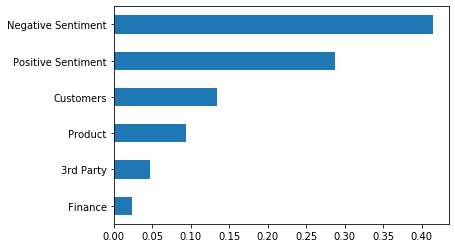

In [49]:
s.sort_values(ascending=True).plot(kind='barh')

In [60]:
X.max()

neg_sent    0.049
pos_sent    0.225
Topic0      0.970
Topic1      0.210
Topic2      0.970
Topic3      0.490
dtype: float64

In [99]:
import random

In [100]:
random.randint(0,100)

19

In [101]:
r = DataFrame(index=['1','2','3','4','5','6'])

In [102]:
for i in range(1560):
    rand = []
    for j in range(6):
        rand.append(random.randint(0,1000)/1000)
    r[i] = rand

In [103]:
r.T

,1,2,3,4,5,6
0,0.987,0.374,0.301,0.749,0.411,0.633
1,0.103,0.507,0.662,0.312,0.641,0.495
2,0.664,0.273,0.354,0.775,0.979,0.155
3,0.354,0.820,0.392,0.948,0.913,0.487
4,0.107,0.722,0.841,0.958,0.004,0.325
...,...,...,...,...,...,...
1555,0.311,0.450,0.820,0.385,0.131,0.286
1556,0.090,0.432,0.300,0.478,0.242,0.739
1557,0.600,0.640,0.221,0.636,0.259,0.651
1558,0.369,0.127,0.138,0.130,0.450,0.377


In [104]:
df['y_30']

0       False
1        True
2       False
3       False
4       False
        ...  
1555    False
1556     True
1557     True
1558    False
1559     True
Name: y_30, Length: 1560, dtype: bool

In [105]:
X = r.T
y = df['y_30']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

param_grid = {'n_estimators' : [10, 20, 50, 100],
        'learning_rate' : [0.1, 0.01, 0.001],
        'max_depth' : [2,4,6]}

model = GradientBoostingClassifier()
grid_search = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [106]:
grid_search.best_score_

0.49345191981484815

In [110]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

In [111]:
model = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 6, n_estimators= 100)

In [112]:
model.fit(X,y)
importances = model.feature_importances_

In [113]:
importances

array([0.17187726, 0.17155213, 0.18644045, 0.1504978 , 0.16064954,
       0.15898281])